# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [325]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Data clean # convert ID to strings
study_results["Mouse ID"] = study_results["Mouse ID"].astype(str)
print(study_results["Mouse ID"])

# Combine the data into a single DataFrame
df_merged = mouse_metadata.merge(study_results, on= "Mouse ID")

# Display the data table for preview
df_merged.head()

0       b128
1       f932
2       g107
3       a457
4       c819
        ... 
1888    r944
1889    u364
1890    p438
1891    x773
1892    b879
Name: Mouse ID, Length: 1893, dtype: object


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [326]:
# Checking the number of mice.
len(df_merged["Mouse ID"].unique())

249

In [327]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_id = df_merged[df_merged.duplicated(subset=["Mouse ID", "Timepoint"])]["Mouse ID"].unique()

In [328]:
# Optional: Get all the data for the duplicate mouse ID. 
df_merged[df_merged["Mouse ID"] == dup_id[0]]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [329]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_merged = df_merged[df_merged["Mouse ID"] != dup_id[0]]

In [330]:
# Checking the number of mice in the clean DataFrame.
len(df_merged["Mouse ID"].unique())

248

## Summary Statistics

In [331]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
df_Regi_tumor_grp = df_merged.groupby("Drug Regimen")["Tumor Volume (mm3)"]
mean_tumor_volume = df_Regi_tumor_grp.mean()
median_tumor_volume = df_Regi_tumor_grp.median()
var_tumor_volume = df_Regi_tumor_grp.var()
SD_tumor_volume = df_Regi_tumor_grp.std()
SE_tumor_volume = df_Regi_tumor_grp.sem()

stats = pd.DataFrame({	
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume":median_tumor_volume,	
    "Tumor Volume Variance": var_tumor_volume,	
    "Tumor Volume Std. Dev.": SD_tumor_volume,	
    "Tumor Volume Std. Err.": SE_tumor_volume
})
stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [332]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
stats = df_merged.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

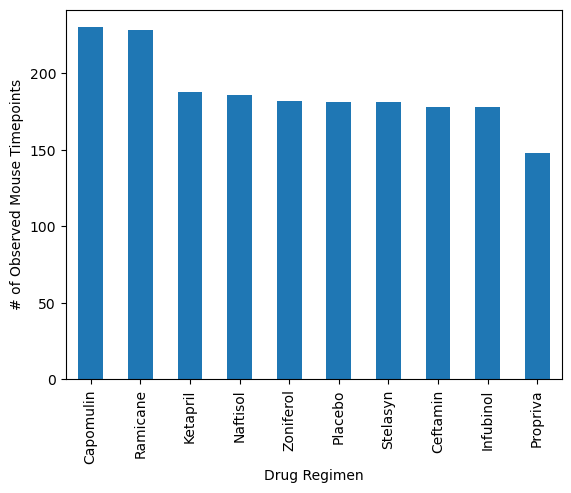

In [333]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
df_regi_count = df_merged.groupby("Drug Regimen")[["Mouse ID"]].count().sort_values(by = "Mouse ID", ascending = False)
fig = df_regi_count.plot(kind = "bar", legend = None)
fig.set_ylabel("# of Observed Mouse Timepoints")

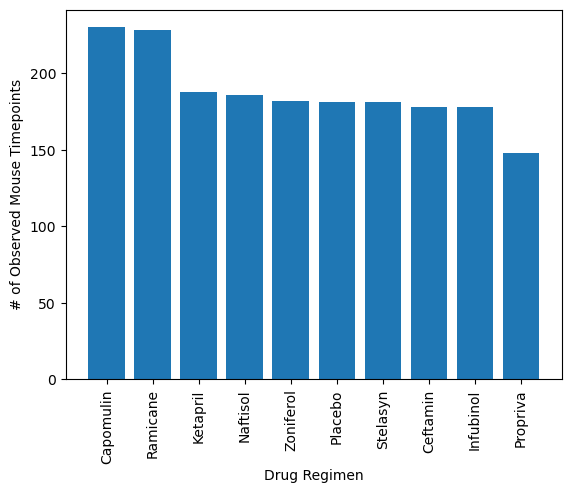

In [334]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(df_regi_count.index, df_regi_count["Mouse ID"])
plt.xticks(df_regi_count.index, rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

<Axes: ylabel='Sex'>

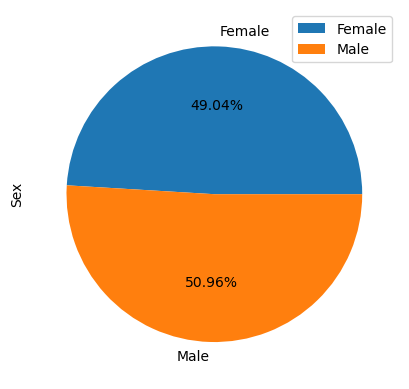

In [335]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
df_mice_sex = df_merged.groupby("Sex")[["Sex"]].count()
df_mice_sex.plot(kind = "pie", y = "Sex", autopct = "%.2f%%")

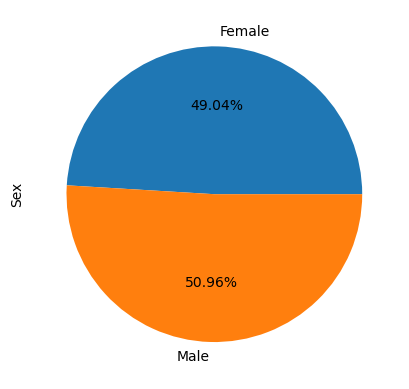

In [336]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(df_mice_sex["Sex"], labels = df_mice_sex.index, autopct = "%.2f%%")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [337]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
df_CRIC_Regi = df_merged[(df_merged["Drug Regimen"] == "Capomulin") | 
                      (df_merged["Drug Regimen"] == "Ramicane") |
                      (df_merged["Drug Regimen"] == "Infubinol") |
                      (df_merged["Drug Regimen"] == "Ceftamin")]
# Start by getting the last (greatest) timepoint for each mouse
max_time = df_CRIC_Regi.groupby("Mouse ID")[["Timepoint"]].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
df_final_tp = df_CRIC_Regi.merge(max_time, on = ["Mouse ID", "Timepoint"])
df_final_tp


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [338]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = df_final_tp["Drug Regimen"].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for idx, treatment in enumerate(treatments):

    # get the rows of mice with the particular regimen
    mice_w_treatment = df_final_tp[df_final_tp["Drug Regimen"] == treatment][["Tumor Volume (mm3)"]]
    tumor_vol.append(mice_w_treatment["Tumor Volume (mm3)"])

    # calculate the quartiles and IQR
    fq = mice_w_treatment["Tumor Volume (mm3)"].quantile(.25)
    tq = mice_w_treatment["Tumor Volume (mm3)"].quantile(.75)
    iqr = tq - fq
    
    # Establish upper and lower bounds
    upper_bound = tq + 1.5 * iqr
    lower_bound = fq - 1.5 * iqr

    #query to get potential outliers ie. out of bound values
    outliers = mice_w_treatment[(mice_w_treatment["Tumor Volume (mm3)"] > upper_bound) | (mice_w_treatment["Tumor Volume (mm3)"] < lower_bound)]["Tumor Volume (mm3)"]
    print(f"{treatments[idx]}'s potential outliers: {outliers}")


Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 58    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


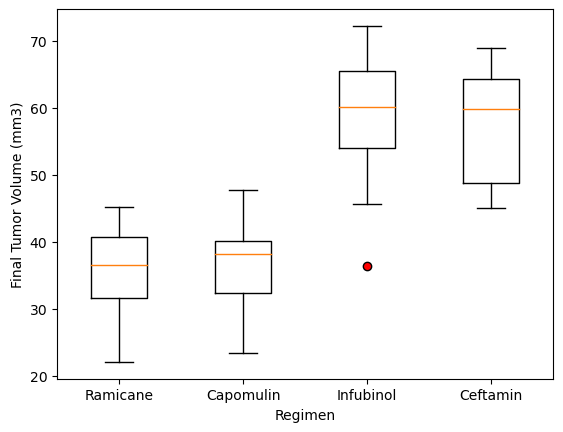

In [339]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig = plt.boxplot(tumor_vol, flierprops = {"markerfacecolor" : "red"})
plt.xlabel("Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([x for x in range(1, len(treatments) + 1)],treatments)
plt.show()

## Line and Scatter Plots

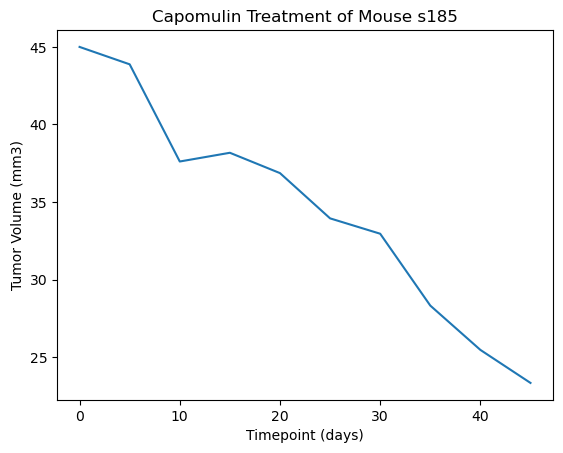

In [340]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
all_mouse_w_c = df_merged[df_merged["Drug Regimen"] == "Capomulin"]["Mouse ID"].unique()

mouse_id = all_mouse_w_c[0]
one_mouse_data = df_merged[df_merged["Mouse ID"] == mouse_id][["Timepoint", "Tumor Volume (mm3)"]]

plt.plot(one_mouse_data["Timepoint"], one_mouse_data["Tumor Volume (mm3)"])
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.title(f"Capomulin Treatment of Mouse {mouse_id}")
plt.show()

# # ## pandas version
# one_mouse_data = one_mouse_data.set_index("Timepoint")
# one_mouse_data.plot(kind = "line")
# plt.ylabel("Tumor Volume (mm3)")
# plt.xlabel("Timepoint (days)")
# plt.title(f"Capomulin Treatment of Mouse {mouse_id}")


Text(0.5, 1.0, 'Average Tumor Volume (mm3) vs. Weight (g)')

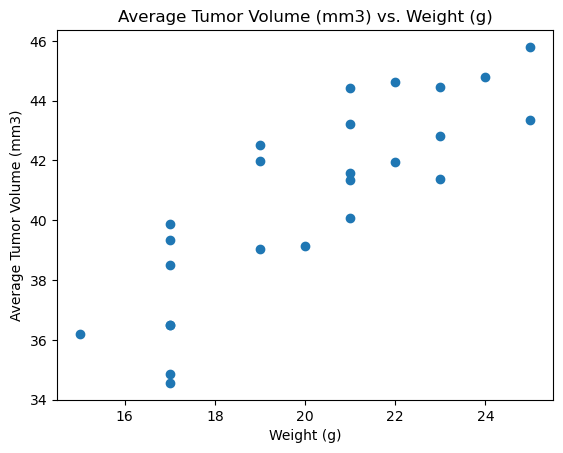

In [341]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
weightNTumor = df_merged[df_merged["Drug Regimen"] == "Capomulin"].groupby("Mouse ID").agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"})
plt.scatter(weightNTumor["Weight (g)"], weightNTumor["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume (mm3) vs. Weight (g)")

#pandas verseion
# weightNTumor.plot(kind= "scatter", x = "Weight (g)", y = "Tumor Volume (mm3)")
# plt.xlabel("Weight (g)")
# plt.ylabel("Average Tumor Volume (mm3)")
# plt.title("Average Tumor Volume (mm3) vs. Weight (g)")

## Correlation and Regression

The correlation between mouse weight and the average tumor volume 0.84


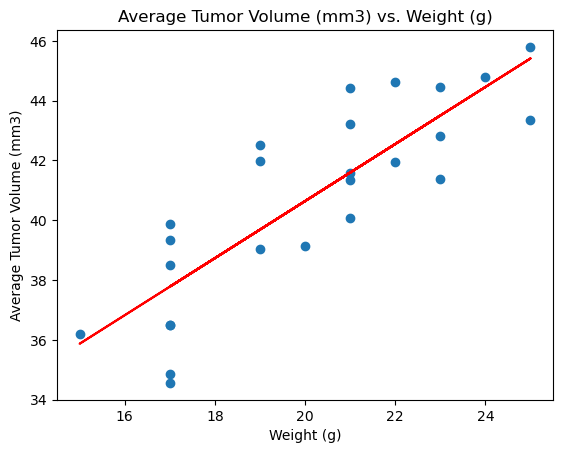

In [342]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
res = st.linregress(weightNTumor["Weight (g)"], weightNTumor["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume {round(res.rvalue, 2)}")

#plot the original points from the last cell
weightNTumor = df_merged[df_merged["Drug Regimen"] == "Capomulin"].groupby("Mouse ID").agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"})
plt.scatter(weightNTumor["Weight (g)"], weightNTumor["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume (mm3) vs. Weight (g)")

#  plot the regression line
plt.plot(weightNTumor["Weight (g)"], res.intercept + res.slope * weightNTumor["Weight (g)"], 'r')
plt.show()

